<a href="https://colab.research.google.com/github/ShuvoBipul/Assignment-1/blob/main/PM_2_5_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/SkillMorph_Dataset/dhaka_air_quality_2000_2025.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.set_index('datetime', inplace=True)


In [10]:
df.sort_index(inplace=True)


In [11]:
df.dropna(inplace=True)


In [12]:
print(f"Data range: {df.index[0]} to {df.index[-1]}")


Data range: 2000-01-01 00:00:00 to 2025-10-04 23:00:00


In [13]:
print(df.head())
print("\n" + "="*50 + "\n")


                            AQI      PM2.5        PM10         O3        NO2  \
datetime                                                                       
2000-01-01 00:00:00  121.861086  44.200712   93.224101  20.586862  15.391414   
2000-01-01 01:00:00   99.598077  35.212704   78.893066  22.429471  26.824534   
2000-01-01 02:00:00  132.852834  48.575428  118.693959  37.838094  33.403493   
2000-01-01 03:00:00  154.588259  64.208516   86.427166  26.747684  12.137395   
2000-01-01 04:00:00  114.102260  41.112699   70.193382  33.192759  25.313206   

                           SO2        CO  Temperature   Humidity  Wind_Speed  \
datetime                                                                       
2000-01-01 00:00:00  28.219932  1.049477    20.956667  71.272569    8.375675   
2000-01-01 01:00:00  24.385188  0.943859    13.761031  42.616871   10.880553   
2000-01-01 02:00:00  28.951413  0.887131    20.216907  59.169387   15.041183   
2000-01-01 03:00:00  26.950990  0.79326

In [14]:
df.head(3)

,AQI,PM2.5,PM10,O3,NO2,SO2,CO,Temperature,Humidity,Wind_Speed,Pressure
datetime,,,,,,,,,,,
2000-01-01 00:00:00,121.861086,44.200712,93.224101,20.586862,15.391414,28.219932,1.049477,20.956667,71.272569,8.375675,1011.742574
2000-01-01 01:00:00,99.598077,35.212704,78.893066,22.429471,26.824534,24.385188,0.943859,13.761031,42.616871,10.880553,1010.949986
2000-01-01 02:00:00,132.852834,48.575428,118.693959,37.838094,33.403493,28.951413,0.887131,20.216907,59.169387,15.041183,1012.065387


In [15]:
print(df.describe())


                 AQI          PM2.5           PM10             O3  \
count  225816.000000  225816.000000  225816.000000  225816.000000   
mean      173.879455     105.495390     178.668865      50.070796   
std        47.853187      55.878730      95.030366      18.186844   
min        20.833333       5.000000      10.000000       5.000000   
25%       153.495856      62.135134     105.427706      37.130329   
50%       171.495329      96.298134     164.382639      48.391279   
75%       194.740957     140.418337     240.081570      61.145886   
max       299.599600     250.000000     400.000000     124.493286   

                 NO2            SO2             CO    Temperature  \
count  225816.000000  225816.000000  225816.000000  225816.000000   
mean       34.295663      23.082057       1.644556      26.042161   
std        12.189406       7.695508       0.535873       5.142185   
min         5.000000       2.000000       0.100000      10.345658   
25%        25.622285      17.7217

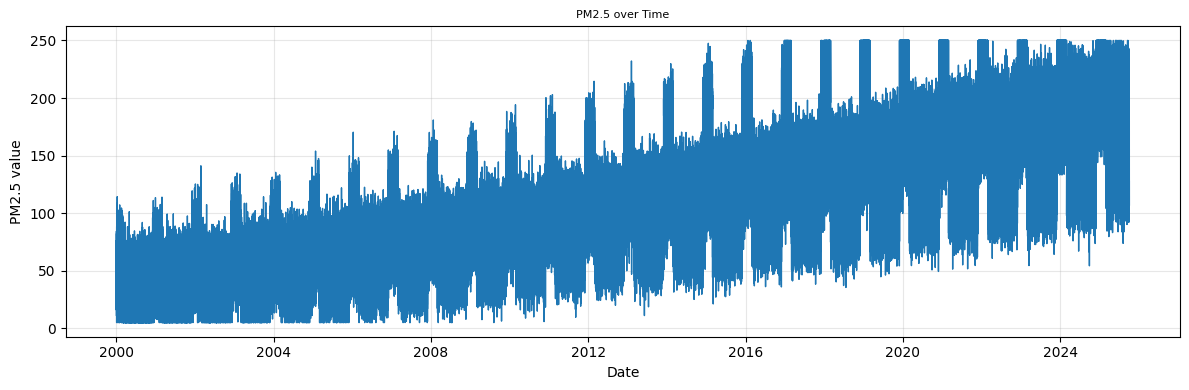

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["PM2.5"], linewidth=1.0)
plt.title("PM2.5 over Time", fontsize=8)
plt.xlabel("Date")
plt.ylabel("PM2.5 value")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error, mean_squared_error